This is my attempt to implement an extremely simple Linear model in PyTorch. It is being done as part of my efforts to get really familiar with PyTorch; my go to exercise when learning a new framework has become implementing the simplest Linear model possible; if I can't do that easily, then I don't understand the philosophy of the framework.

In [69]:
from torch.autograd import Variable
import torch
import torch.utils.data
import torch.nn as nn
import numpy as np
import torch.optim as optim

Here, we're defining a Linear function that takes in a vector, x, some coefficients and returns the output of applying the linear function created by the coefficients.

In [70]:
def lin(x,a,b):
    return a*x + b 

Just specifying some constants. 

Notice that in the last line of this block, I am adding some random Gaussian noise to the output of the linear function so as to make it somewhat less contrived.

In [71]:
num_samples = 100
X = torch.linspace(-5,5,num_samples)
coefficient = 2
intercept = 3
Y = lin(X, coefficient, intercept) + torch.randn(num_samples) 

In [72]:
%matplotlib inline

In [73]:
import matplotlib.pyplot as plt

Here, I'd just like to get a look at what my points are.

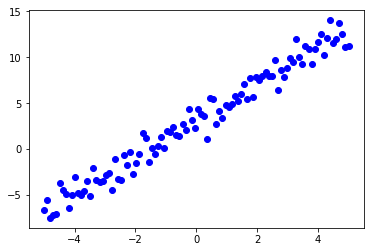

In [74]:
plt.plot(X.numpy(),Y.numpy(), 'bo')

Now, we have to create the linear model in PyTorch and use SGD or some other optimizer to learn the correct values of the coefficients from the data.

Since PyTorch is more OO, I'm creating a Net class that will model the linear function I'm trying to approximate. We'll define a Linear layer with 1 input and 1 output.

In [75]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(1,1)
        
    def forward(self, x):
        x = self.fc(x)
        return x
    

net = Net()
print(net)

Net (
  (fc): Linear (1 -> 1)
)


Just to make sure I've understood correctly, I'm going to check the number of parameters. It should be 2, since we're going to have one weight and one bias term.

In [76]:
params = list(net.parameters())
print(len(params))

2


In [77]:
# set up train loader
trainloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X,Y))
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.000001, momentum=0.9)

In [78]:

for i in range(10):
    for i, data in enumerate(trainloader):
        inputs, output = data
        inputs, output = Variable(inputs.float()), Variable(output.float())
        optimizer.zero_grad()
        out = net(inputs)
        loss = criterion(out, output)
        loss.backward()
        optimizer.step()
    

I had some weird loss changes in the above; I'm chalking it up to the optimizer not settling into a nice region; the parameters that it learns seem pretty good thought.

In [55]:
params = list(net.parameters())
for i in params:
    print(i)

Parameter containing:
 1.9814
[torch.FloatTensor of size 1x1]

Parameter containing:
 2.9452
[torch.FloatTensor of size 1]



Now, for kicks, plot the output from the model we learned.

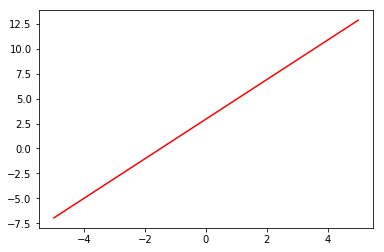

In [68]:
num_samples = 100
X_test = torch.linspace(-5,5,num_samples)
Y_test = torch.zeros(num_samples)

Y_test = net(Variable(torch.unsqueeze(X_test.float(), 1)))
    
plt.plot(X.numpy(), Y.data.numpy(), 'r-')